<a href="https://colab.research.google.com/github/heehee812/NST_with_creativity/blob/main/combinational_creativity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
# Link your google drive to this notebook
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
from pathlib import Path

# Print current working directory
print('Now we are at ', end='')
!pwd

# Create the folders we need
if '/content/gdrive/My Drive/Colab_Images' not in os.getcwd():
  Path("gdrive/My Drive/Colab_Images/outputs").mkdir(parents=True, exist_ok=True)
  %cd ./gdrive/My\ Drive/Colab_Images


Now we are at /content
/content/gdrive/My Drive/Colab_Images


# Upload files

In [15]:
from google.colab import files

content_img = files.upload()

Saving Aurea-Luna.jpg to Aurea-Luna.jpg


In [16]:
import os

CONTENT_IMAGE_FN = list(content_img)[0]
CONTENT_IMAGE_FN_temp = CONTENT_IMAGE_FN.strip().replace(" ", "_")

if CONTENT_IMAGE_FN != CONTENT_IMAGE_FN_temp:
  os.rename(CONTENT_IMAGE_FN, CONTENT_IMAGE_FN_temp)
  CONTENT_IMAGE_FN = CONTENT_IMAGE_FN_temp
  
print("Content image filename :", CONTENT_IMAGE_FN)

Content image filename : Aurea-Luna.jpg


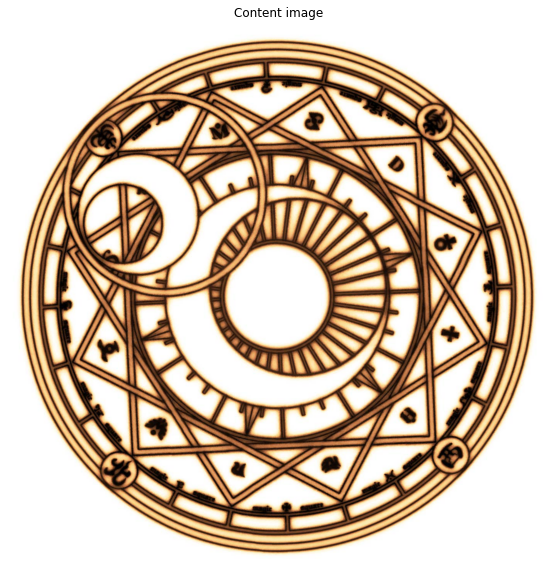

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Content image')
plt.imshow(img)

In [18]:
style_img = files.upload()

Saving sagano_bamboo_forest.jpg to sagano_bamboo_forest.jpg


In [19]:
STYLE_IMAGE_FN = list(style_img)[0]
STYLE_IMAGE_FN_temp = STYLE_IMAGE_FN.strip().replace(" ", "_")

if STYLE_IMAGE_FN != STYLE_IMAGE_FN_temp:
  os.rename(STYLE_IMAGE_FN, STYLE_IMAGE_FN_temp)
  STYLE_IMAGE_FN = STYLE_IMAGE_FN_temp

print("Style image filename :", STYLE_IMAGE_FN)

Style image filename : sagano_bamboo_forest.jpg


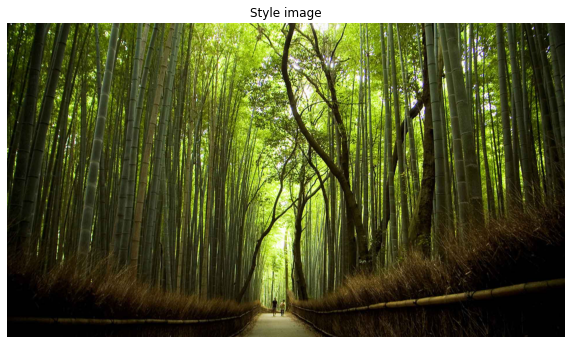

In [20]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Style image')
plt.imshow(img)

# For making the combinational creativity, we have 4 instances:
1. Put all the stlye with part of the items
2. Put some of the style with some part of the items
3. Put all of the style with all of the items
4. put some of the style with all of the items

## 1. Stay the origin main item with background

### Change image into grayscale

> To change the background of the item, we habe to change the content image einto grayscale first, and stay the white range. 


In [21]:
from PIL import Image

pre_content_img_name = CONTENT_IMAGE_FN
content_img_gray_name= 'content_img_gray.jpg'
content_img_grayinv_name= 'content_img_grayinv.jpg'
img = Image.open(pre_content_img_name)
imgGray = img.convert('L')
imgGray = imgGray.point(lambda x: 0 if x<128 else 255, '1')
imgGray = imgGray.convert('RGB')
imgGray.save(content_img_gray_name)

### Stay origin item and substitute the background to style

> Combine white part with origin RGB, change black part to white

In [22]:
import cv2
img1 = cv2.imread(pre_content_img_name)
img2 = cv2.imread(content_img_gray_name)
imgcontent = cv2.bitwise_and(img1, img2, dst=None, mask=None)
cv2.imwrite(content_img_gray_name, imgcontent)

True

### Make a mask for style background

In [23]:
pre_style_img_name = STYLE_IMAGE_FN
style_img_gray_name= 'style_img_gray.jpg'
img1 = cv2.imread(pre_style_img_name)
img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

In [24]:
img2 = cv2.bitwise_not(img2)
imgstyle = cv2.bitwise_and(img1, img2, dst=None, mask=None)
cv2.imwrite(style_img_gray_name, imgstyle)

True

### Combine two style and content

In [25]:
img = cv2.bitwise_or(imgcontent, imgstyle, dst=None, mask=None)
cv2.imwrite(style_img_gray_name, img)

True